## outputs/features

In [13]:
import pandas as pd
import pyarrow.parquet as pq
import torch
import yaml
import os

# Since EDA.ipynb is inside 'outputs/', the paths should be relative to it
output_dir = "."  # Instead of "./outputs"

### 1️⃣ Exploring Feature Data ###
feature_dir = os.path.join(output_dir, "features")

# Check if directory exists
if not os.path.exists(feature_dir):
    print(f"⚠️ Warning: The directory '{feature_dir}' does not exist.")
    print("Make sure you have run `python -m corebehrt.main.create_data` to generate data.")
else:
    feature_files = [f for f in os.listdir(feature_dir) if f.endswith(".parquet")]
    
    if not feature_files:
        print("⚠️ Warning: No feature files found in 'features/'.")
    else:
        print("\n📂 Found feature files:", feature_files)
        # Load the first available feature Parquet file
        parquet_path = os.path.join(feature_dir, feature_files[0])
        df = pd.read_parquet(parquet_path)

        print("\n📝 First few rows of feature data:")
        print("\n abspos: days before 26.01.2020:", df.shape)
        display(df[:20])  # Use display() for better Jupyter output


        # Show feature column names
        print("\n🔹 Feature Columns:")
        display(df.columns.tolist())

        # Check data types
        print("\n🔍 Data Types:")
        display(df.dtypes)

        # Summary statistics
        print("\n📊 Summary Statistics:")
        display(round(df,0).describe())

        # Check for missing values
        print("\n❗ Missing Values:")
        display(df.isnull().sum())



📂 Found feature files: ['part.4.parquet', 'part.3.parquet', 'part.2.parquet', 'part.0.parquet', 'part.1.parquet']

📝 First few rows of feature data:

 abspos: days before 26.01.2020: (13708, 6)


,PID,concept,RESULT,age,abspos,segment
0,003eca82-f8a1-48b5-804f-dc86a0bf940f,45,123.0,19.0,-420549.762778,0
1,003eca82-f8a1-48b5-804f-dc86a0bf940f,992,146.0,24.0,-373984.710278,1
2,003eca82-f8a1-48b5-804f-dc86a0bf940f,919,153.0,26.0,-357597.725556,2
3,003eca82-f8a1-48b5-804f-dc86a0bf940f,401,159.0,31.0,-308397.281667,3
4,003eca82-f8a1-48b5-804f-dc86a0bf940f,532,143.0,39.0,-241091.742778,4
5,003eca82-f8a1-48b5-804f-dc86a0bf940f,974,142.0,40.0,-230499.858611,5
6,003eca82-f8a1-48b5-804f-dc86a0bf940f,128,161.0,41.0,-227568.152778,6
7,003eca82-f8a1-48b5-804f-dc86a0bf940f,738,122.0,41.0,-221073.086667,7
8,003eca82-f8a1-48b5-804f-dc86a0bf940f,151,142.0,50.0,-142715.669167,8
9,003eca82-f8a1-48b5-804f-dc86a0bf940f,692,132.0,56.0,-89948.260278,9



🔹 Feature Columns:


['PID', 'concept', 'RESULT', 'age', 'abspos', 'segment']


🔍 Data Types:


PID        string[python]
concept            object
RESULT            float64
age               float32
abspos            float64
segment             int32
dtype: object


📊 Summary Statistics:


,RESULT,age,abspos,segment
count,13708.000000,13708.000000,13708.000000,13708.000000
mean,149.354173,27.599285,-181723.879341,5.235337
std,28.916982,19.682158,140534.922125,2.785710
min,100.000000,-1.000000,-438888.000000,0.000000
25%,125.000000,11.000000,-298323.000000,3.000000
50%,149.000000,25.000000,-170039.000000,6.000000
75%,174.000000,41.000000,-57824.250000,8.000000
max,199.000000,84.000000,43233.000000,9.000000



❗ Missing Values:


PID        0
concept    0
RESULT     0
age        0
abspos     0
segment    0
dtype: int64

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_parquet("./features/part.0.parquet")

# Check current sorting
print("\n🔍 Current Sorting Order:")
print(df[['PID', 'abspos', 'segment']].head(20))

# Check sorting logic
print("\n🔍 Check Sorting:")
sorted_by_segment = df.sort_values(['segment', 'abspos'])
print(sorted_by_segment[['PID', 'abspos', 'segment']].head(20))


🔍 Current Sorting Order:
                                     PID         abspos  segment
0   0043909b-a626-4325-bef6-2d1b0b581f0a -411086.112222        0
1   0043909b-a626-4325-bef6-2d1b0b581f0a -285798.195278        1
2   0043909b-a626-4325-bef6-2d1b0b581f0a -279571.724722        2
3   0043909b-a626-4325-bef6-2d1b0b581f0a -181191.373333        3
4   0043909b-a626-4325-bef6-2d1b0b581f0a -153341.788611        4
5   0043909b-a626-4325-bef6-2d1b0b581f0a -143356.264167        5
6   0043909b-a626-4325-bef6-2d1b0b581f0a  -95443.375833        6
7   0043909b-a626-4325-bef6-2d1b0b581f0a  -83837.082778        7
8   0043909b-a626-4325-bef6-2d1b0b581f0a  -82183.022778        8
9   0043909b-a626-4325-bef6-2d1b0b581f0a   18146.803889        9
10  00543abf-5102-4c5b-9d8b-ff05d3093529 -219909.774444        3
11  00543abf-5102-4c5b-9d8b-ff05d3093529 -168724.434167        4
12  00543abf-5102-4c5b-9d8b-ff05d3093529 -130837.308056        5
13  00543abf-5102-4c5b-9d8b-ff05d3093529  -63044.030833        6

/Users/ellenebdrup/Documents/GitHub/EHR_ELMA/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


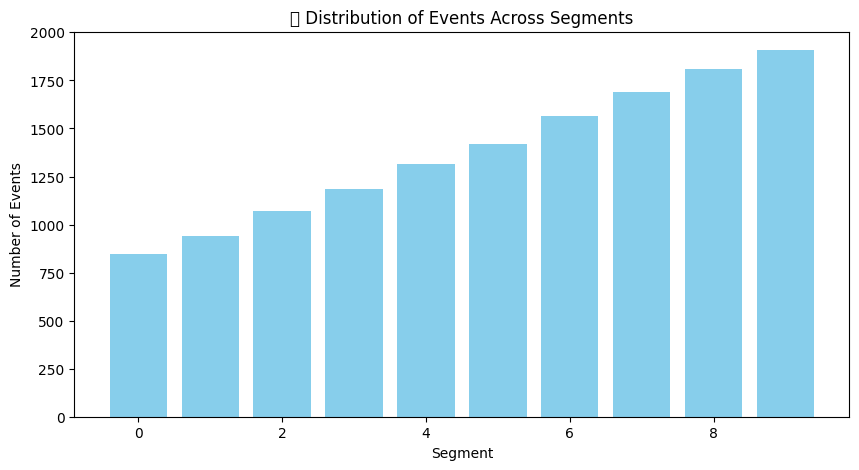

In [17]:
import matplotlib.pyplot as plt

# Plot the count of events per segment
segment_counts = df['segment'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(segment_counts.index, segment_counts.values, color='skyblue')
plt.title("📊 Distribution of Events Across Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Events")
plt.show()

## outputs/tokenized

In [4]:
### 2️⃣ Exploring Tokenized Data ###
tokenized_dir = os.path.join(output_dir, "tokenized")

if not os.path.exists(tokenized_dir):
    print(f"⚠️ Warning: The directory '{tokenized_dir}' does not exist.")
else:
    token_files = [f for f in os.listdir(tokenized_dir) if f.endswith(".pt")]
    print("\n📂 Found tokenized files:", token_files)

    # Load tokenized vocabulary
    vocab_path = os.path.join(tokenized_dir, "vocabulary.pt")
    if os.path.exists(vocab_path):
        vocab = torch.load(vocab_path)
        print("\n📌 Tokenized Vocabulary Sample:")
        print ("Total tokens in vocabulary: ", len(vocab))
        display(dict(list(vocab.items())[:10]))  # Show first 10 tokens

    # Load pretraining patient IDs
    pids_pretrain_path = os.path.join(tokenized_dir, "pids_pretrain.pt")
    if os.path.exists(pids_pretrain_path):
        pids_pretrain = torch.load(pids_pretrain_path)
        print("\n👤 Sample Patient IDs for Pretraining:")
        display(pids_pretrain[:10])  # Show first 10 patient IDs


### 3️⃣ Exploring Configuration File ###
config_path = os.path.join(feature_dir, "data_config.yaml")
if os.path.exists(config_path):
    with open(config_path, "r") as f:
        config_data = yaml.safe_load(f)
    print("\n⚙️ Feature Extraction Config:")
    display(config_data)


📂 Found tokenized files: ['pids_test.pt', 'pids_pretrain.pt', 'vocabulary.pt', 'pids_finetune.pt']

📌 Tokenized Vocabulary Sample:
Total tokens in vocabulary:  1005


/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/1279179565.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vocab = torch.load(vocab_path)


{'[PAD]': 0,
 '[CLS]': 1,
 '[SEP]': 2,
 '[UNK]': 3,
 '[MASK]': 4,
 '840': 5,
 '506': 6,
 '485': 7,
 '247': 8,
 '248': 9}


👤 Sample Patient IDs for Pretraining:


/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/1279179565.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pids_pretrain = torch.load(pids_pretrain_pat

['007ec05d-2789-4fd5-a840-1fe34c4b316e',
 '00cb24bc-3b39-43b3-8dd8-f5a517c20e18',
 '00fb8ae7-1ee6-4306-b2f1-83c00743338a',
 '011c1b84-11ab-4562-961e-fdbc4542667e',
 '0192bf5c-85b4-48b0-81fa-1f36c1ce909a',
 '01d55da4-3532-4ac3-b533-0ef14c4fffeb',
 '01edd8e0-2e5a-4995-b3be-61f4ee42b016',
 '02a46407-f982-4d8d-a617-64929bc0210f',
 '030879de-511c-4dc2-997e-c11e5dd9550b',
 '0335038e-60d1-40e8-b327-25c74303c50c']


⚙️ Feature Extraction Config:


{'excluder': {'max_age': 120, 'min_age': -1},
 'features': {'background_vars': ['GENDER'],
  'origin_point': {'day': 26, 'month': 1, 'year': 2020}},
 'loader': {'concept_types': ['diagnose', 'medication', 'labtest'],
  'include_values': ['labtest']},
 'logging': {'level': 'INFO', 'path': './outputs/logs'},
 'paths': {'data': './example_data/example_data_w_labs',
  'features': './outputs/features',
  'tokenized': './outputs/tokenized'},
 'split_ratios': {'finetune': 0.18, 'pretrain': 0.72, 'test': 0.1},
 'tokenizer': {'cls_token': True, 'sep_tokens': True},
 'values': {'normalize': {'func': 'corebehrt.modules.normalizer.ValuesNormalizer.min_max_normalize_results',
   'kwargs': {'min_count': 3}},
  'value_type': 'binned',
  'value_type_kwargs': {'multiplication_factor': 100}}}

In [7]:
# Load tokenized vocabulary
vocab_path = os.path.join(tokenized_dir, "vocabulary.pt")
pids_pretrain_path = os.path.join(tokenized_dir, "pids_pretrain.pt")

if os.path.exists(vocab_path) and os.path.exists(pids_pretrain_path):
    # Load vocabulary
    vocab = torch.load(vocab_path)
    print("\n📌 Tokenized Vocabulary (full):")
    for token, idx in vocab.items():
        print(f"{token}: {idx}")

    # Load patient IDs
    patient_ids = torch.load(pids_pretrain_path)

    # Display tokens for the first 5 patients
    print("\n👤 Tokenized Sequences for 5 Patients:")
    for i, patient_id in enumerate(patient_ids[:2]):
        print(f"\n🔹 Patient {i+1} (ID: {patient_id}):")
        if isinstance(vocab, dict):
            # Display all tokens for this patient if available
            patient_tokens = {k: v for k, v in vocab.items() if str(patient_id) in k}
            if patient_tokens:
                for token, idx in patient_tokens.items():
                    print(f"{token}: {idx}")
            else:
                print("No tokens found for this patient.")
        else:
            print("⚠️ Vocabulary format not as expected.")

else:
    print("\n❗ Vocabulary or patient ID file not found. Check your paths.")





📌 Tokenized Vocabulary (full):
[PAD]: 0
[CLS]: 1
[SEP]: 2
[UNK]: 3
[MASK]: 4
840: 5
506: 6
485: 7
247: 8
248: 9
736: 10
815: 11
592: 12
180: 13
171: 14
713: 15
732: 16
253: 17
961: 18
791: 19
942: 20
491: 21
694: 22
431: 23
764: 24
544: 25
512: 26
236: 27
639: 28
827: 29
65: 30
651: 31
427: 32
400: 33
921: 34
181: 35
672: 36
897: 37
160: 38
364: 39
971: 40
115: 41
865: 42
246: 43
303: 44
928: 45
81: 46
622: 47
521: 48
882: 49
6: 50
259: 51
245: 52
728: 53
509: 54
439: 55
142: 56
295: 57
992: 58
418: 59
208: 60
311: 61
309: 62
416: 63
813: 64
337: 65
838: 66
778: 67
121: 68
436: 69
287: 70
421: 71
31: 72
46: 73
114: 74
325: 75
344: 76
426: 77
874: 78
887: 79
744: 80
590: 81
263: 82
881: 83
446: 84
525: 85
956: 86
589: 87
396: 88
452: 89
635: 90
497: 91
357: 92
818: 93
657: 94
583: 95
48: 96
193: 97
740: 98
774: 99
948: 100
453: 101
549: 102
501: 103
25: 104
493: 105
486: 106
94: 107
412: 108
698: 109
268: 110
465: 111
18: 112
392: 113
912: 114
627: 115
415: 116
979: 117
262: 118
157: 1

/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/3335952083.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vocab = torch.load(vocab_path)
/var/folders/v

## outputs/pretraining

In [24]:
import torch

# Load the checkpoint
checkpoint_path = "./pretraining/checkpoints/checkpoint_epoch999_end.pt"
model_state = torch.load(checkpoint_path, map_location='cpu')

# Display the available keys in the checkpoint
print("🔍 Checkpoint Keys:", model_state.keys())

🔍 Checkpoint Keys: dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'train_loss', 'val_loss', 'val_metrics', 'test_metrics', 'final_step_loss'])


/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/2666672239.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state = torch.load(checkpoint_path, map

In [28]:
import torch

# Define the path to the checkpoint file
checkpoint_path = "./pretraining/checkpoints/checkpoint_epoch999_end.pt"

# Load the checkpoint
checkpoint = torch.load(checkpoint_path, map_location="cpu")

# Print the top-level keys
print("\n🔍 Checkpoint Keys:", list(checkpoint.keys()))

# Print detailed values for each key
for key, value in checkpoint.items():
    print(f"\n🔹 Key: {key}")
    
    # Check the type of the value to print it properly
    if isinstance(value, dict):
        print("📦 Dictionary Contents:")
        for subkey, subvalue in value.items():
            print(f"  - {subkey}: {subvalue.shape if hasattr(subvalue, 'shape') else type(subvalue)}")
    
    elif isinstance(value, torch.Tensor):
        print(f"🧠 Tensor Shape: {value.shape}")
        print(f"🔢 Sample Values: {value.flatten()[:10].tolist()}")  # Print first 10 elements
    
    elif isinstance(value, (list, tuple)):
        print(f"📋 List/Tuple with {len(value)} elements")
        print(f"🔢 Sample Values: {value[:5]}")  # Print first 5 elements
    
    else:
        print(f"⚙️ Value: {value}")


🔍 Checkpoint Keys: ['epoch', 'model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'train_loss', 'val_loss', 'val_metrics', 'test_metrics', 'final_step_loss']

🔹 Key: epoch
⚙️ Value: 1

🔹 Key: model_state_dict
📦 Dictionary Contents:
  - embeddings.LayerNorm.weight: torch.Size([96])
  - embeddings.LayerNorm.bias: torch.Size([96])
  - embeddings.concept_embeddings.weight: torch.Size([1005, 96])
  - embeddings.age_embeddings.w0: torch.Size([1, 1])
  - embeddings.age_embeddings.phi0: torch.Size([1])
  - embeddings.age_embeddings.w: torch.Size([1, 95])
  - embeddings.age_embeddings.phi: torch.Size([95])
  - embeddings.abspos_embeddings.w0: torch.Size([1, 1])
  - embeddings.abspos_embeddings.phi0: torch.Size([1])
  - embeddings.abspos_embeddings.w: torch.Size([1, 95])
  - embeddings.abspos_embeddings.phi: torch.Size([95])
  - embeddings.segment_embeddings.weight: torch.Size([1024, 96])
  - layers.0.attn.Wqkv.weight: torch.Size([288, 96])
  - layers.0.attn.Wo.weight: torch.Size

/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/1478880958.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_

In [33]:
import torch

# Load the vocabulary
vocab = torch.load("./pretraining/processed_data/vocabulary.pt")

# Display the first 10 vocabulary items
print("🔠 Vocabulary Sample:", list(vocab.items())[:10])

🔠 Vocabulary Sample: [('[PAD]', 0), ('[CLS]', 1), ('[SEP]', 2), ('[UNK]', 3), ('[MASK]', 4), ('840', 5), ('506', 6), ('485', 7), ('247', 8), ('248', 9)]


/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/3096018979.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vocab = torch.load("./pretraining/processed_d

## outputs/outcomes


🔍 Outcome Data:


,TIMESTAMP,PID,abspos
0,2002-08-09 14:43:56,03695022-6f3c-48dc-b313-20df1da1ca57,-153081
1,1969-12-31 23:59:59,043d29a8-ca90-4c83-97df-9fd77c019156,-438888
2,2011-01-11 19:47:26,047f7dd4-abd9-4db7-a4a3-3b44e19acc4b,-79228
3,1995-11-24 00:08:01,05621e5f-e5ef-4253-aa59-c6dd563dbd45,-211895
4,1988-05-09 09:22:07,07123aac-01c7-4ccd-9f4a-606ea6631f17,-278006



🔍 Censor Data:


,TIMESTAMP,PID,abspos
0,1969-12-31 23:59:59,043d29a8-ca90-4c83-97df-9fd77c019156,-438888
1,1995-11-24 00:08:01,05621e5f-e5ef-4253-aa59-c6dd563dbd45,-211895
2,1988-05-09 09:22:07,07123aac-01c7-4ccd-9f4a-606ea6631f17,-278006
3,1991-11-21 06:50:54,0ac30b23-996d-42cc-9408-62b884bd6e0e,-247025
4,1969-12-31 23:59:59,0b1ef56e-1ad6-4dca-9f81-b83594b0ba3d,-438888



📊 Outcome Events Over Time:

📊 Censoring Events Over Time:


<Axes: title={'center': 'Censoring Events Per Year'}, xlabel='TIMESTAMP'>

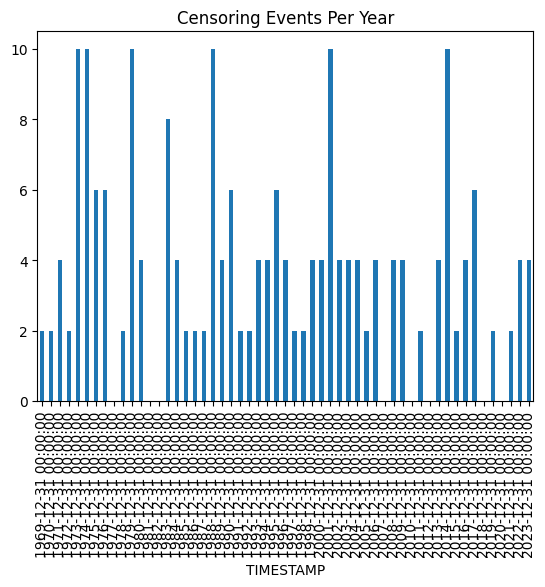

In [38]:
import pandas as pd

# Load outcome and censor files
outcome_df = pd.read_csv("./outcomes/TEST_OUTCOME.csv")
censor_df = pd.read_csv("./outcomes/TEST_CENSOR.csv")

# Display samples
print("\n🔍 Outcome Data:")
display(outcome_df.head())

print("\n🔍 Censor Data:")
display(censor_df.head())

# Check event distribution
print("\n📊 Outcome Events Over Time:")
outcome_df['TIMESTAMP'] = pd.to_datetime(outcome_df['TIMESTAMP'])
outcome_df.set_index('TIMESTAMP').resample('YE').size().plot(kind='bar', title='Outcome Events Per Year')

print("\n📊 Censoring Events Over Time:")
censor_df['TIMESTAMP'] = pd.to_datetime(censor_df['TIMESTAMP'])
censor_df.set_index('TIMESTAMP').resample('YE').size().plot(kind='bar', title='Censoring Events Per Year')

## outputs/cohort


🔍 Loading Patient ID Files...
👥 Total Patient IDs: 317
🎯 Test Patient IDs: 31

📆 Sample of Index Dates:


/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/2953954580.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pids = torch.load(os.path.join(cohort_dir, "

,PID,TIMESTAMP
0,283d8e29-b3a1-42b6-b2eb-98eac33b08f4,2000-05-30 18:29:10
1,55515e6d-2fc5-4b7a-8956-7ce70c756b53,1996-12-02 16:15:56
2,5ee0b1b9-ae4e-4ee8-bc71-f717072b61a2,1983-03-11 04:11:35
3,6646b6db-8402-41be-9cbd-e54402be0b25,1980-11-27 07:18:37
4,852c2a63-672c-47de-93ef-157e327d8580,2014-04-07 10:53:43



📑 Folds Structure: [{'train': [np.str_('85679b62-52c2-4a14-8960-373defe824a9'), np.str_('b7c216a9-ccce-4c69-b36b-24d66aa4a01d'), np.str_('284f631f-0f73-4423-b20b-5ad7c641b256'), np.str_('91a99bc6-f6f6-4d17-83d7-c6c16dea78af'), np.str_('23c85b31-d87b-49b5-ac7b-a2736c5c6ea0'), np.str_('3976b1a6-65e3-4c6f-abd6-d04d93096ed6'), np.str_('c10894d3-b7cb-48bd-9952-0bd584b11737'), np.str_('a01c37ae-5aa3-4138-aa77-70291737a0fa'), np.str_('b2dbe6a1-d604-4bcf-b943-b1da63573c65'), np.str_('dc04952f-4c5d-4afc-a697-4a182a2d8f53'), np.str_('97dde282-ced9-4ed5-9a51-82b7debe37b7'), np.str_('3b065a66-6ee1-40c1-840e-5e3f614552b7'), np.str_('55af9714-363c-4c13-8073-7e1186dcf18d'), np.str_('7d523848-2d9e-49d2-9639-557bb45753a7'), np.str_('bcd6cab4-0ec0-40bd-8754-22aef0b268c6'), np.str_('5e24cbf2-483f-4d78-942c-72a7a5e0e808'), np.str_('fc9b1b49-84b1-413c-ab23-dbe146ebe6db'), np.str_('4f6f2d23-a9f8-4513-873c-5bdcc3e06711'), np.str_('ae8f79e4-740b-4488-8a45-5559633b50f2'), np.str_('a7158a82-02b4-44c6-9090-1269

/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/2953954580.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_dates_df.set_index('TIMESTAMP').resample('Y').size().plot(kind='bar', color='skyblue', title='🗓️ Event Count per Year')
/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/2953954580.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowliste

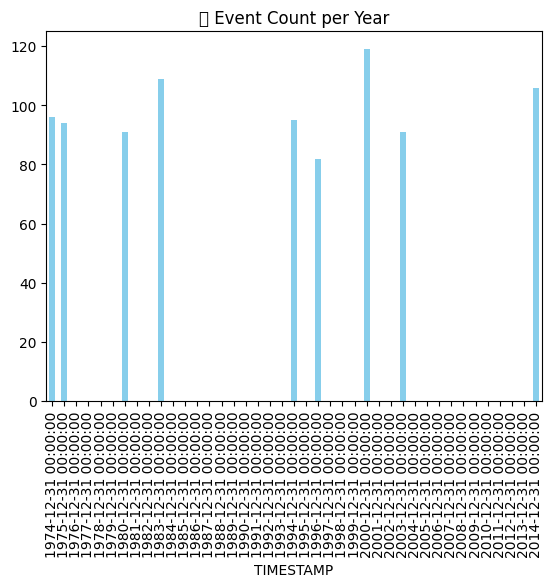

In [40]:
import torch
import pandas as pd
import os

# Set cohort directory
cohort_dir = "./cohort"

# 1️⃣ Load Patient ID Files
print("\n🔍 Loading Patient ID Files...")
pids = torch.load(os.path.join(cohort_dir, "pids.pt"))
test_pids = torch.load(os.path.join(cohort_dir, "test_pids.pt"))

print(f"👥 Total Patient IDs: {len(pids)}")
print(f"🎯 Test Patient IDs: {len(test_pids)}")

# 2️⃣ Load and Explore Index Dates
index_dates_path = os.path.join(cohort_dir, "index_dates.csv")
index_dates_df = pd.read_csv(index_dates_path)

print("\n📆 Sample of Index Dates:")
display(index_dates_df.head())

# Analyze distribution of index dates
index_dates_df['TIMESTAMP'] = pd.to_datetime(index_dates_df['TIMESTAMP'])
index_dates_df.set_index('TIMESTAMP').resample('Y').size().plot(kind='bar', color='skyblue', title='🗓️ Event Count per Year')

# 3️⃣ Load Folds
folds = torch.load(os.path.join(cohort_dir, "folds.pt"))
print("\n📑 Folds Structure:", folds)

# 4️⃣ Load Cohort Config
import yaml

config_path = os.path.join(cohort_dir, "cohort_config.yaml")
with open(config_path, 'r') as file:
    cohort_config = yaml.safe_load(file)

print("\n⚙️ Cohort Configuration:")
for key, value in cohort_config.items():
    print(f"{key}: {value}")

print("\n✅ Cohort exploration complete.")

## outputs/finetuning

In [43]:
import torch
import os

# Paths
fold1_dir = "./finetuning/fold_1"
fold2_dir = "./finetuning/fold_2"

# Load train/val/test PIDs for fold 1
train_pids = torch.load(os.path.join(fold1_dir, "train_pids.pt"))
val_pids = torch.load(os.path.join(fold1_dir, "val_pids.pt"))
test_pids = torch.load(os.path.join(fold1_dir, "test_pids.pt"))

print(f"🧠 Fold 1 - Train PIDs: {len(train_pids)}")
print(f"🧪 Fold 1 - Val PIDs: {len(val_pids)}")
print(f"🎯 Fold 1 - Test PIDs: {len(test_pids)}")

# Load train/val/test PIDs for fold 2
train_pids2 = torch.load(os.path.join(fold2_dir, "train_pids.pt"))
val_pids2 = torch.load(os.path.join(fold2_dir, "val_pids.pt"))
test_pids2 = torch.load(os.path.join(fold2_dir, "test_pids.pt"))

print(f"\n🧠 Fold 2 - Train PIDs: {len(train_pids2)}")
print(f"🧪 Fold 2 - Val PIDs: {len(val_pids2)}")
print(f"🎯 Fold 2 - Test PIDs: {len(test_pids2)}")

# Display sample PIDs
print("\n👁️ Sample PIDs Fold 1 (Train):", train_pids[:5])
print("👁️ Sample PIDs Fold 2 (Test):", test_pids2[:5])

🧠 Fold 1 - Train PIDs: 127
🧪 Fold 1 - Val PIDs: 127
🎯 Fold 1 - Test PIDs: 63

🧠 Fold 2 - Train PIDs: 127
🧪 Fold 2 - Val PIDs: 127
🎯 Fold 2 - Test PIDs: 63

👁️ Sample PIDs Fold 1 (Train): ['03195565-7bd6-45b6-b59b-575d101d8b6f', '0f054714-8edc-42ad-b0a0-24ab3785ea7c', '11566472-79ce-420b-9c7d-06c6cc7d852c', '1b02427c-63b5-4ec7-a5d1-8584396ffca2', '1f5bc9d3-2f8b-4f02-9986-d4810bd06d20']
👁️ Sample PIDs Fold 2 (Test): ['04191e96-e8c9-4a1f-a623-10277a31374a', '09d002d9-6b14-4003-8dad-5bd3d024715e', '0eee7cf8-4b98-4043-b06d-4c8b8a7220db', '1fd1e013-fc62-4e24-93ae-dd5d7e89dfae', '23211098-87f2-4f1f-91f1-3744529667f7']


/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/2782200023.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_pids = torch.load(os.path.join(fold1_di

In [45]:
# Load folds structure
folds = torch.load("./finetuning/processed_data/folds.pt")
print("\n 🔍 Cross-Validation Folds:", folds)

# Load vocabulary
vocab = torch.load("./finetuning/processed_data/vocabulary.pt")
print(f"\n 🔠 Vocabulary Size: {len(vocab)}")
print(f"\n 🔍 Sample Vocabulary Items: {list(vocab.items())[:10]}")


 🔍 Cross-Validation Folds: [{'train': ['03195565-7bd6-45b6-b59b-575d101d8b6f', '0f054714-8edc-42ad-b0a0-24ab3785ea7c', '11566472-79ce-420b-9c7d-06c6cc7d852c', '1b02427c-63b5-4ec7-a5d1-8584396ffca2', '1f5bc9d3-2f8b-4f02-9986-d4810bd06d20', '21801a07-85b5-4f0c-9a93-a6603200ff3d', '25d70957-45e7-4147-91f7-db4539be2523', '262a42a6-2aff-4faf-8677-b73042b50839', '284f631f-0f73-4423-b20b-5ad7c641b256', '2bfd5d80-adbf-4a94-ad1c-b59126402704', '2c5e16d2-a08c-4c22-8a48-c423d63a8db9', '2d863da5-8182-401f-9eef-f2fb4cb2b1e7', '2e32f7de-7378-4005-bce0-4e03a3b3fb11', '311213cd-2b6d-4c4f-9e95-a15c05c6b7fe', '326a204d-5df8-4723-92e6-51fa1f27f4ec', '3389a818-2cd5-437d-b200-cb8b94271eb1', '35ba0b0d-f4a5-4ce0-be48-9ac25b6e9590', '3976b1a6-65e3-4c6f-abd6-d04d93096ed6', '3b7bda3d-1713-4dd1-8e03-014a3cc26b37', '3ecae9bd-3724-4be0-b05b-c3e2830917da', '3f8ef968-dd6d-40d6-a237-f9a37f7ae986', '423ee94f-ba98-4cdc-96c7-9b219187455c', '424cb769-a80c-451c-b8f8-7d88c8b0cd20', '43cd013e-eec8-4879-af00-a1bc80bf29dc', 

/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/3035692152.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  folds = torch.load("./finetuning/processed_da

📊 Test Scores (Mean/STD):


,metric,mean,std
0,accuracy,0.968254,0.000000
1,false_negatives,0.000000,0.000000
2,false_positives,2.000000,0.000000
3,mean_probability,0.043730,0.013747
4,pr_auc,0.403950,0.181456
5,precentage_positives,0.000000,0.000000
6,roc_auc,0.725410,0.052164
7,true_negatives,0.000000,0.000000
8,true_positives,61.000000,0.000000



📊 Validation Scores (Mean/STD):


,metric,mean,std
0,accuracy,0.988189,0.005568
1,false_negatives,0.000000,0.000000
2,false_positives,1.500000,0.707107
3,mean_probability,0.043873,0.011613
4,pr_auc,0.262346,0.353553
5,precentage_positives,0.000000,0.000000
6,roc_auc,0.524540,0.225511
7,true_negatives,0.000000,0.000000
8,true_positives,125.500000,0.707107


/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/3102401784.py:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/ellenebdrup/Documents/GitHub/EHR_ELMA/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


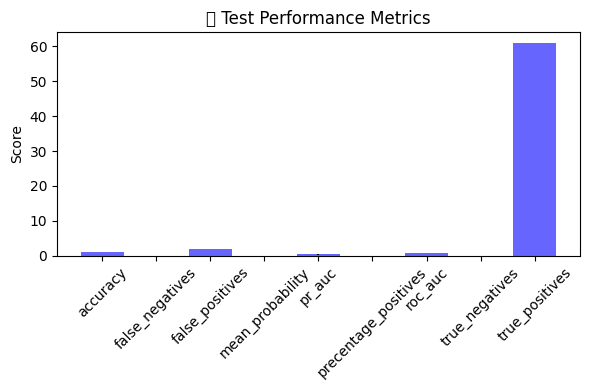

/var/folders/vy/l49fzb3j41b_bvyvsvdcjwb40000gn/T/ipykernel_27759/3102401784.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


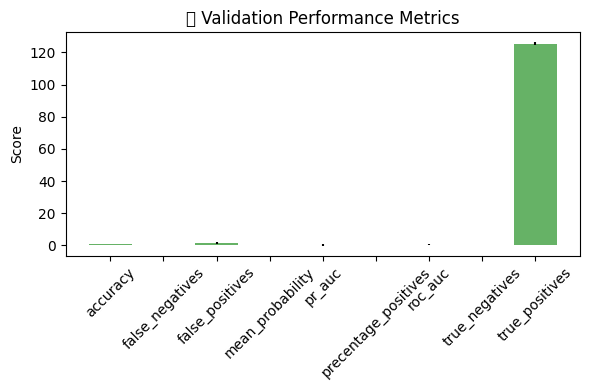

In [46]:
import pandas as pd

# Load test and validation scores
test_scores = pd.read_csv("./finetuning/test_scores_mean_std_20250214-1837.csv")
val_scores = pd.read_csv("./finetuning/val_scores_mean_std_20250214-1837.csv")

# Display summary statistics
print("📊 Test Scores (Mean/STD):")
display(test_scores)

print("\n📊 Validation Scores (Mean/STD):")
display(val_scores)

# Visualize test vs validation performance
import matplotlib.pyplot as plt

# Plot test scores
plt.figure(figsize=(6, 4))
plt.bar(test_scores['metric'], test_scores['mean'], yerr=test_scores['std'], alpha=0.6, color='blue')
plt.title("📈 Test Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot validation scores
plt.figure(figsize=(6, 4))
plt.bar(val_scores['metric'], val_scores['mean'], yerr=val_scores['std'], alpha=0.6, color='green')
plt.title("📈 Validation Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()